<div align="center">
  <h1>Homework 4</h1>
    <p>
        <div align="center">
        <h2>Yutong Dai yutongd3@illinois.edu</h2>
        </div>
    </p>
</div>

## 3.6
a) According to the graph below, the optimal value for the objective function is $-\frac{11}{3}$, which is attained at $(\frac{1}{3},\frac{4}{3})$.

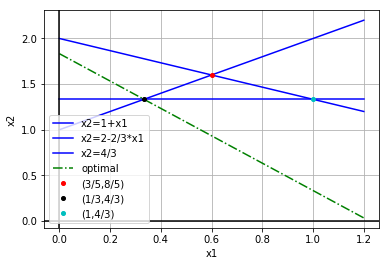

In [5]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0,1.2,100)
fig, ax = plt.subplots()
ax.plot(x, 1 + x, 'b-', markersize=2, label="x2=1+x1")
ax.plot(x, 2-(2/3)*x, 'b-', markersize=2, label="x2=2-2/3*x1")
ax.plot(x, np.zeros_like(x)+4/3, 'b-', markersize=2, label="x2=4/3")
ax.plot(x, -(3/2)*x - (1/2) * (-11/3), "g-.", label="optimal")
plt.plot(3/5,8/5,'ro',markersize=4, label='(3/5,8/5)')
plt.plot(1/3,4/3,'ko',markersize=4, label='(1/3,4/3)')
plt.plot(1,4/3,'co',markersize=4, label='(1,4/3)')
ax.grid(True, which='both')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

b)

Rewrite the problem in the standard form,

$$
\begin{align}
& \max \quad -3x_1  - 2x_2\\
& s.t \quad -x_1 + x_2 + x_3 = 1\\
& \qquad 2x_1 + 3x_2 + x_4 = 6\\
& \qquad x_2 -x_5 = \frac{4}{3} \\
& \qquad x_1,...,x_5\geq 0
\end{align}
$$

Then we partition the matrix $A$ as

$$
A=
\begin{bmatrix}
-1 & 1 & 1 & || & 0 & 0 \\
2  & 3 & 0 & || & 1 & 0\\
0  & 1 & 0 & || & 0 & -1
\end{bmatrix},
$$

So $B=
\begin{bmatrix}
-1 & 1 & 1 \\
2  & 3 & 0 \\
0  & 1 & 0 \\
\end{bmatrix}$, 
$N=
\begin{bmatrix}
 0 & 0 \\
 1 & 0\\
 0 & -1
\end{bmatrix}$, $C_B^T=(-3,-2,0)$, $C_N^T=(0,0)$, $b^T=(1,6,4/3)$.

So the **basic feasible solution** is $x_0^T=[(B^{-1}b)^T,0^T]=(1, 4/3, 2/3, 0, 0)$.
And the tableau form is given below.

|   | $z$ | $x_1$ | $x_2$ | $x_3$ | $x_4$ | $x_5$ | RHS |
| --- | --- | --- | --- | --- | --- | --- | --- |
| $z$ | -1 | 0 | 0 | 0 |1.5  | 2.5 |  17/3|
| $x_1$| 0| 1 | 0 | 0 |  0.5  | 1.5 |  1|
| $x_2$| 0| 0 | 1 | 0 |   0 | -1 | 4/3 |
| $x_3$| 0| 0 | 0 | 1 |  0.5  | 2.5 |  2/3|


In [70]:
B = np.array([[-1,1,1],[2,3,0],[0,1,0]])
N = np.array([[0,0],[1,0],[0,-1]])
CB = np.array([[-3],[-2],[0]])
CN = np.array([[0],[0]])
b = np.array([[1],[6],[4/3]])
print("Current Cost:{}".format(np.dot(CB.T,np.linalg.inv(B).dot(b))))
print("Current BFS:{}".format(np.linalg.inv(B).dot(b).T))
print("Cost Reduction:{}".format(CN.T-np.dot(CB.T,np.linalg.inv(B)).dot(N)))
print("B.inv * N:\n{}".format(np.linalg.inv(B).dot(N)))

Current Cost:[[-5.66666667]]
Current BFS:[[1.         1.33333333 0.66666667]]
Cost Reduction:[[1.5 2.5]]
B.inv * N:
[[ 0.5  1.5]
 [ 0.  -1. ]
 [ 0.5  2.5]]


c) Choose $x_4$ as the pivot column.
$\delta=\min\{1/0.5, (2/3)/(0.5)\}=4/3$, then the tableau becomes to

|   | $z$ | $x_1$ | $x_2$ | $x_3$ | $x_4$ | $x_5$ | RHS |
| --- | --- | --- | --- | --- | --- | --- | --- |
| $z$ | -1 | 0 | 0 | -3 |0  | -5 |  11/3|
| $x_1$| 0| 1 | 0 | -1 |  0  | -1 |  1/3|
| $x_2$| 0| 0 | 1 | 0 |   0 | -1 | 4/3 |
| $x_4$| 0| 0 | 0 | 2 |  1  | 5 |  4/3|

So the current solution is $(1/3, 4/3, 0, 4/3, 0)$ and the base matrix is
$B=
\begin{bmatrix}
-1 & 1 &  0  \\
2  & 3 & 1 \\
0  & 1 &  0 
\end{bmatrix}$.

Since all the cost is negative, the solution is optimal for the maximization problem.

d)
In order to draw the requirements space, we need to reformulate this problem.

$$
\begin{align}
& \max \quad -3x_1  - 2x_2' - \frac{8}{3}\\
& s.t \quad -x_1 + x_2' + x_3 = -\frac{1}{3}\\
& \qquad 2x_1 + 3x_2' + x_4 = 2\\
& \qquad x_1,x_2',x_3,x_4\geq 0
\end{align}
$$

i) According to the discussion with the TA, the possible bases are defined as 2 by 2 matrix.

They are 

$$
\begin{align}
& B_1 = 
\begin{bmatrix}
-1 & 1 \\
2  & 3 
\end{bmatrix},
B_2 = 
\begin{bmatrix}
-1 & 1 \\
2  & 0 
\end{bmatrix},
B_3 = 
\begin{bmatrix}
-1 & 0 \\
2  & 1 
\end{bmatrix}\\
& B_4 = 
\begin{bmatrix}
1 & 1\\
3 & 0
\end{bmatrix},
B_5 = 
\begin{bmatrix}
1 & 0\\
3 & 1
\end{bmatrix},
B_6 = 
\begin{bmatrix}
1 & 0\\
0 & 1
\end{bmatrix}
\end{align}
$$

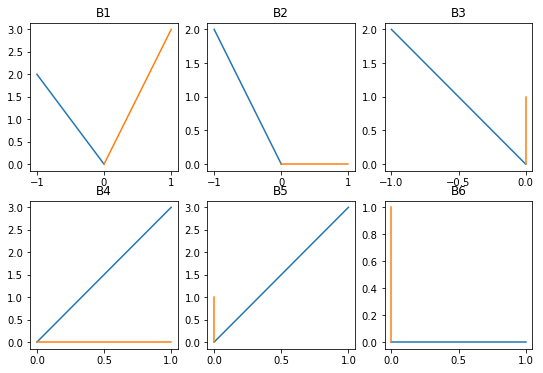

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(9,6))
ax1.plot([-1,0], [2,0])
ax1.plot([1,0], [3,0])
ax1.set_title('B1')
ax2.plot([-1,0], [2,0])
ax2.plot([1,0], [0,0])
ax2.set_title('B2')
ax3.plot([-1,0], [2,0])
ax3.plot([0,0], [1,0])
ax3.set_title('B3')

ax4.plot([1,0], [3,0])
ax4.plot([1,0], [0,0])
ax4.set_title('B4')
ax5.plot([1,0], [3,0])
ax5.plot([0,0], [1,0])
ax5.set_title('B5')
ax6.plot([1,0], [0,0])
ax6.plot([0,0], [1,0])
ax6.set_title('B6')
plt.show()


ii) 

Possible feasible bases are given as

$$
B_1 =
\begin{bmatrix}
-1 & 1 \\
2  & 3 
\end{bmatrix},
B_2 =
\begin{bmatrix}
-1 & 1 \\
2  & 0 
\end{bmatrix},
B_3=
\begin{bmatrix}
-1 & 0 \\
2  & 1 
\end{bmatrix}.
$$

In [25]:
import numpy as np
A = np.array([[-1,1,1,0],[2,3,0,1]])
b = np.array([[-1/3], [2]])
for i in range(3):
    for j in range(i+1,4):
            a = A[:,[i,j]]
            #print(i,j, np.linalg.inv(a).dot(b))

e)

* The basic matrix $B_1$ corresponds to $(3/5, 8/5)$. 
* The basic matrix $B_2$ corresponds to $(1, 4/3)$.
* The basic matrix $B_3$ correspond to $(1/3, 4/3)$.

## 3.9
By adding a slack variable $x_7$, we can change the maximization problem to the standard form. $p_1,...,p_7$ are 7 basic feasible solutions.


|   | $x_1$ | $x_2$ | $x_3$ | $x_4$ | $x_5$  | $x_6$ | $x_7$ |
| --- | --- | --- | --- | --- | --- | --- | --- |
| $p_1$ | 20 | 0 | 0 | 0 | 0 | 0 | 0 |
| $p_2$ | 0 | 10 | 0 | 0 | 0 | 0 | 0 |
| $p_3$ | 0 | 0 | 20 | 0 | 0 | 0 | 0 |
| $p_4$ | 0 | 0 | 0 | 20 | 0 | 0 | 0 |
| $p_5$ | 0 | 0 | 0 | 0 | 20 | 0 | 0 |
| $p_6$ | 0 | 0 | 0 | 0 | 0 | 15 | 0 |
| $p_7$ | 0 | 0 | 0 | 0 | 0 | 0 | 60 |

Clearly, the optimal value is 100, which attains at the point $p_5$.

**General Methodology:**

Find $j^*\in \arg\max \{\frac{c_j}{a_j}\}$. Then the $j^*$(s) indicate(s) the optimal solution, where we set the  $j^*$-th coordinate to $b/a_j$ while keep the rest coordinates 0.

If $c_j <0 \text{ or } c_j > 0, a_j\leq 0$, then just skip calculating $\frac{c_j}{a_j}$, since those variables won't become basic variables.

## 3.13
a) The objective value will increase by $3\times 7 = 21$.

b) **No**. If have some $j$ such that $c_j-z_j > 0$, then we can let $x_j$ enter the basic variables and kick out one from the basic variables, while still keep increasing the objective function value.

c) **Yes**. Suppose $x_0$ is a BFS, then $c^T(x_0+ \lambda d) \geq c^Tx_0,\forall \lambda \geq 0$. Notice that $x_0+ \lambda d$ is still in the feasible set, so the problem is unbounded.

d) **No**. If all the BFS of $X$ are non-degenerated, then the statement is true.

e) **No**. When the optimal solution is degenerated, we stay at the same BFS after one iteration.

f) **False**. A point can lead to multiple different bases. So $B_1$ and $B_2$ are not necessarily adjacent.

g) **True**. Consider the case that cost $c$ is $0$, then every feasible solution is optimal.

h) The tight upper bound on the feasible bases is $m+1$ while the tight upper bound on the BFS is $m+1$.

i) **False**. Consider a convex cone defined by $n+1$ hyper-planes, then it can have $n+1$ extreme directions. For example, the figure below has more than 3 extreme directions. (Source:Google Image.)

![(a)](./figs/cone.png)

j) **True**. Since the degree of the degeneracy is $1$, we know that there are $r=n-m+1$ planes from $x\geq 0$ are binding and there are $q=m-(r-(n-m))=m-1$ basic variables are positive. Each possible choice of a basis $B$ that includes the columns of these $q$ positive variables represents $\bar x$. So there are $C_{n-(m-1)}^{m-(m-1)}=n-m+1$ bases associate with this $\bar x$.

## 3.18

a) **False**. The cost of every consecutive BFS visited by the simplex is strictly less than the cost of the previous one. otherwise the algorithms is supposed to terminate. To see this,  in every iteration, the algorithm is moving along a direction $d_j$ with positive distance given by the minimal ratio test, where $j$ satisfies $(c_j-z_j)< 0, j \in N$.

b) **True**. Assume $x_r$ is leaving the basic variables and $x_k$ enters. Then previous $c_j-z_j$ changes from zero to $-\frac{c_k-z_k}{y_{k,r}}$, which is positive. So $x_r$ can no longer enter the basic variables.

c) **False**. Look at the example p.114 of Chapter 3 of the BT's book. The problem is,

$$
\begin{align}
& \min x_5 + x_6 + x_7 + x_8 \\
& s.t \quad  x_1 + 2x_2+ 3x_3 +x_5 = 3\\
& \qquad -x_1 + 2x_2 + 6x_3 + x_6= 2 \\
& \qquad 4x_2 + 9x_3+ x_7 = 5\\
& \qquad 3x_3 + x_4 + x_8 = 1\\
& \qquad x_1,...,x_8 \geq 0
\end{align}
$$

Let's begin with $(0, 0, 0, 0, 3, 2, 5, 1)$. 

* In the first iteration, $x_4$ enteres and the BFS is $(0, 0, 0, 1, 3, 2, 5, 0 )$.
* In the very next iteration, $x_4$ leaves and the BFS is $(0, 0, 1/3, 0, 2, 0, 2, 0)$.

d) **False**. When the optimal solution is not unique, the statement is false. Consider the following problem

$$
\begin{align}
& \min x_1\\
& s.t \quad  x_2 - x_3 = 1\\
& \qquad x_2 + x_4 = 2\\
& \qquad x_1,x_2,x_3,x_4\geq 0
\end{align}
$$

Consider 
$B_1 =
\begin{bmatrix}
1 & -1 \\
1  & 0 
\end{bmatrix}$, the BFS is $(0, 2, 1, 0)$ and non-degenerated. Also, consider 
$B_2 =
\begin{bmatrix}
1 & 0 \\
1  & 1 
\end{bmatrix}$, the BFS is $(0, 1, 0, 1)$ and non-degenerated. 

e) **False**. Consider the cost $c=0$, then any feasible solution is optimal.